#Dependiencies

In [31]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [36]:
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.2 MB/s eta 0:00:00


In [1]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


# Importing required elements

In [2]:
import pandas as pd
import numpy as np

In [58]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from imblearn.over_sampling import SMOTE

#Feature engineering and set data set

In [91]:
heart_attack_file_path = './sample_data/heart_attack_prediction_dataset.csv'
heart_attack_data = pd.read_csv(heart_attack_file_path)
heart_attack_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [92]:
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
heart_attack_data['Diet'] = heart_attack_data['Diet'].map(ordinal_map)

ordinal_map_sex = {'Male':1, 'Female':0}
heart_attack_data['Sex'] = heart_attack_data['Sex'].map(ordinal_map_sex)

In [93]:
#str = 180/120 = ["180", "120"]
heart_attack_data[['BP_Systolic', 'BP_Diastolic']] = heart_attack_data['Blood Pressure'].str.split('/', expand=True)

# Convert the columns to numeric
heart_attack_data['BP_Systolic'] = pd.to_numeric(heart_attack_data['BP_Systolic'])
heart_attack_data['BP_Diastolic'] = pd.to_numeric(heart_attack_data['BP_Diastolic'])

heart_attack_data = heart_attack_data.drop("Blood Pressure", axis = 1)

heart_attack_data = heart_attack_data.drop(columns=['Country', 'Continent','Hemisphere','Patient ID'])

In [94]:
heart_attack_data.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastolic                         int64
dtype: obje

In [95]:
heart_attack_data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


In [96]:
heart_attack_data.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
dtype: int64

In [97]:
# Choose target and features

X = heart_attack_data[['Sex', 'Age', 'Cholesterol', 'Heart Rate','Diabetes', 'Family History','BP_Systolic','BP_Diastolic',
                        'Smoking', 'Obesity','Alcohol Consumption', 'Diet', 'Exercise Hours Per Week',
                        'Previous Heart Problems', 'Medication Use', 'Triglycerides', 'Sleep Hours Per Day']]

y=heart_attack_data['Heart Attack Risk'].values

# KNN

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1,test_size=0.2)

In [115]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

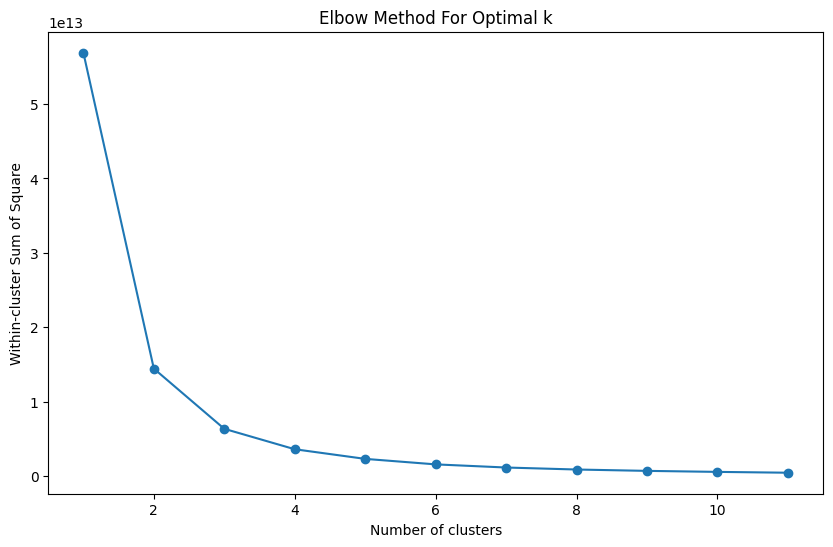

In [119]:
inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 'auto')
    kmeans.fit(heart_attack_data)
    inertia.append(kmeans.inertia_)# Plot the elbow graph

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

In [116]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[847 295]
 [469 142]]
0.5641756988020536


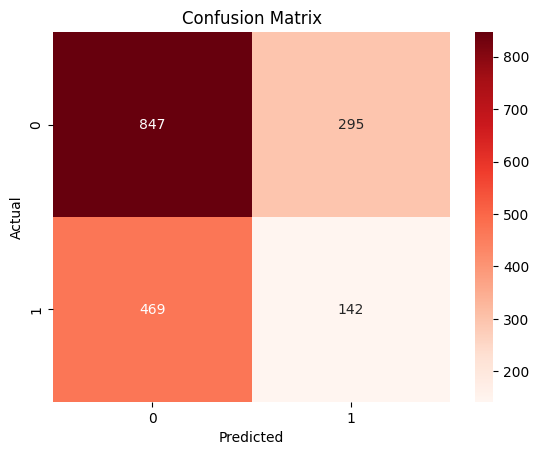

In [117]:
# Evaluate Model

cm_KNN = confusion_matrix(y_test, y_pred)
print (cm_KNN)
print(accuracy_score(y_test, y_pred))

cm_KNN = confusion_matrix(y_test, y_pred)
acc_KNN = accuracy_score(y_test, y_pred)
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# DECISION TREE

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 0)

In [99]:
# Standardize the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [100]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None,5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini','entropy']
}

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}


In [101]:
best_params = grid_search.best_params_

clf = DecisionTreeClassifier(**best_params)

In [102]:
# Train the model on the training set
clf_model = clf.fit(X_train, y_train)

In [103]:
# Predict the test set results
y_pred = clf_model.predict(X_test)

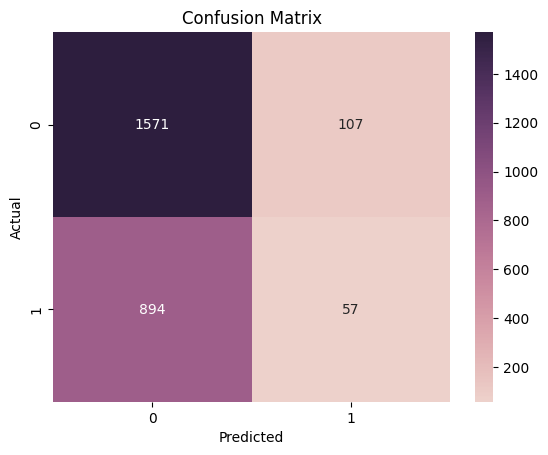

[[1571  107]
 [ 894   57]]
0.6192468619246861


In [104]:
# Evaluate Model

cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm_dt)
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

# Random Forest

In [105]:
smote = SMOTE(random_state = 0)
X_resample, y_resample = smote.fit_resample(X, y)

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample, test_size=0.3, random_state=0)

In [108]:
model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
y_pred = model.predict(X_test)

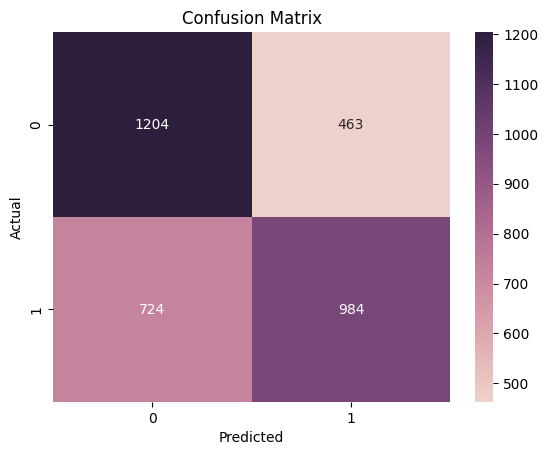

0.6482962962962963


In [110]:
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

#Comparation

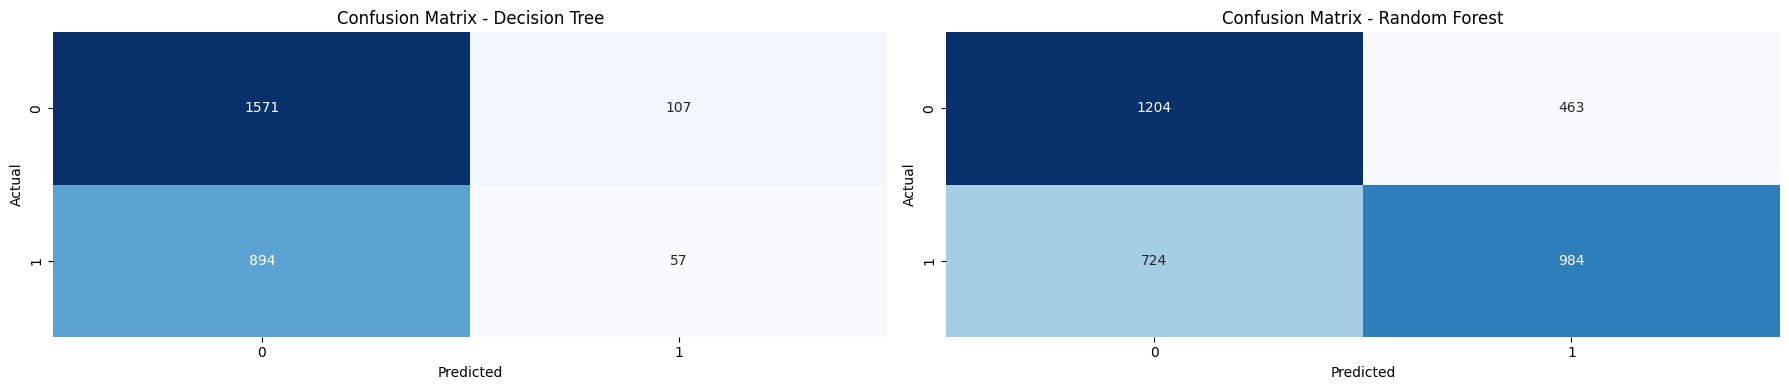

In [112]:
def plot_confusion_matrix(matrix, model_name, ax):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

plot_confusion_matrix(cm_dt, 'Decision Tree', axes[0])
plot_confusion_matrix(cm_rf, 'Random Forest', axes[1])

plt.tight_layout()
plt.show()

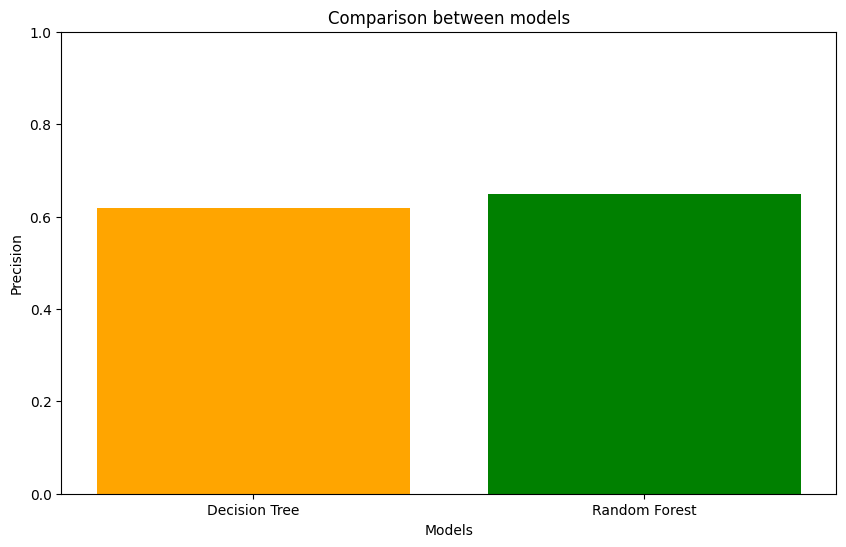

In [113]:
precisions = [acc_dt, acc_rf]
model_names = ['Decision Tree', 'Random Forest']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color=['orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison between models')
plt.ylim(0, 1)
plt.show()

# Bibliography
[Supervised-and-Unsupervised-Learning-Examples](https://github.com/andre1araujo/Supervised-and-Unsupervised-Learning-Examples/blob/main/ML_Notebook.ipynb)

[heart-attack-prediction-dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset?resource=download)

[Supervised Vs. Unsupervised Machine Learning](https://clickup.com/blog/supervised-vs-unsupervised-machine-learning/?utm_source=google-pmax&utm_medium=cpc&utm_campaign=gpm_cpc_ar_nnc_pro_trial_all-devices_tcpa_lp_x_all-departments_x_pmax&utm_content=&utm_creative=_____&gad_source=1&gclid=Cj0KCQjwpZWzBhC0ARIsACvjWROipfBFkemiZ8exCUfSNyEDjsajFYY0w2Kv0iAY_Lpnnk1pZ39rewIaAhfBEALw_wcB)